# Illustrations for the Baseline Model

In [4]:
# import relevant packages 
import pickle 
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import label
from scipy.signal import find_peaks 
import seaborn as sns 
import pywt 
from src.data.preprocess_utils import bin_data

rcParams = {
    "font.family": "serif",  # use serif/main font for text elements
    'text.usetex': True,
    'font.size': 12,
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'axes.labelpad': 1,
    'axes.axisbelow': True,  # draw gridlines below other elements
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        r"\usepackage{url}",            # load additional packages
        r"\usepackage{amsmath,amssymb}",   # unicode math setup
        #  r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
}

plt.rcParams.update(rcParams)

def savefig(fig, name, width=6, height=4):
    # apply rcParams
    fig.set_size_inches(width, height)
    fig.savefig(name, bbox_inches='tight')

sns.set_theme()

### Read data 

In [17]:
path = "../../results/baseline/noise_config_0/snr_1_count_0.pkl"
with open(path, 'rb') as f:
    file = pickle.load(f)
f.close()

channel = 0 
bin_idx = 3

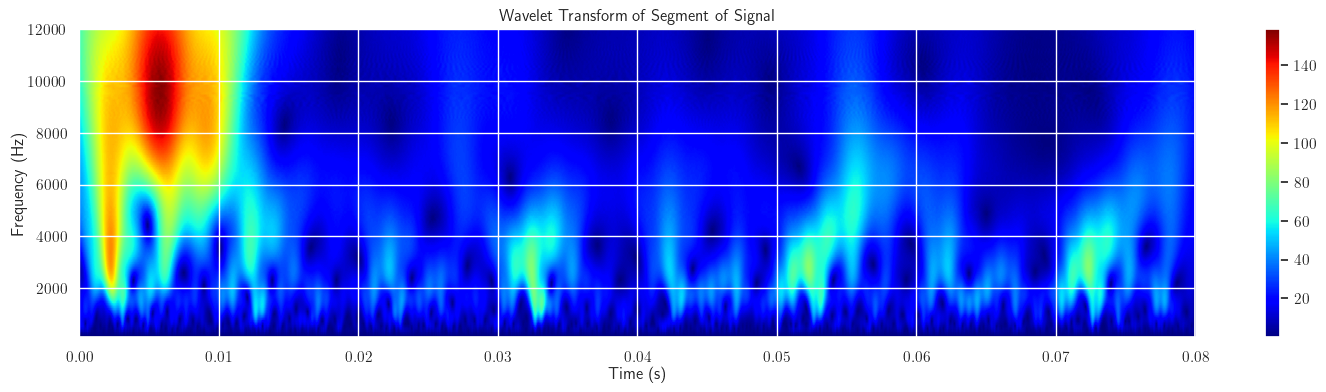

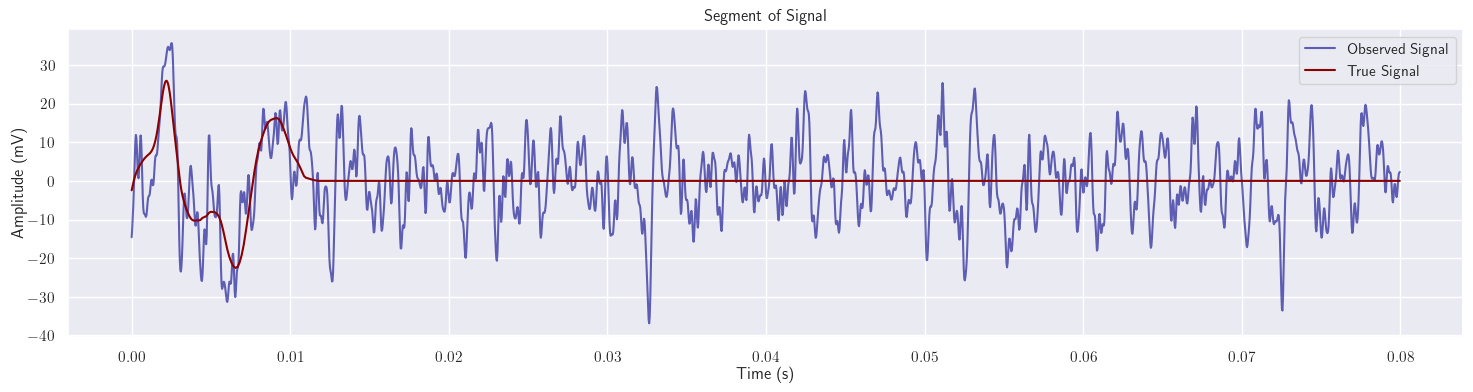

In [ ]:
peaks, _ = find_peaks(file['obs_signal'][:, channel], height = 30, distance = 2900)
bins = bin_data(file['filtered_signal'][:, channel], peaks).T 
true_bins = bin_data(file['true_signal'][:, channel], peaks).T

# apply wavelet transform
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(bins[:, bin_idx], scales=scales, wavelet='cgau2', sampling_period=1/30000)

plt.figure(figsize = (18, 4))
plt.imshow(np.abs(coefficients), extent=[0, len(bins) / 30000, frequencies.min(), frequencies.max()],
           cmap='jet', aspect='auto', origin='lower')
plt.colorbar()
plt.title("Wavelet Transform of Segment of Signal")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")

# plt.savefig("../../../notes/images_week9/wavelet_coefficients.pdf")
plt.show()

plt.figure(figsize = (18, 4))
plt.plot(np.arange(2400) / 30000, bins[:, bin_idx], color = "darkblue", alpha = 0.6)
plt.plot(np.arange(2400) / 30000, true_bins[:, bin_idx], color = "darkred")
plt.title("Segment of Signal")
plt.ylabel("Amplitude (mV)")
plt.xlabel("Time (s)")
plt.legend(["Observed Signal", "True Signal"])

# plt.savefig("../../../notes/images_week9/segment_time_series.pdf")
plt.show()




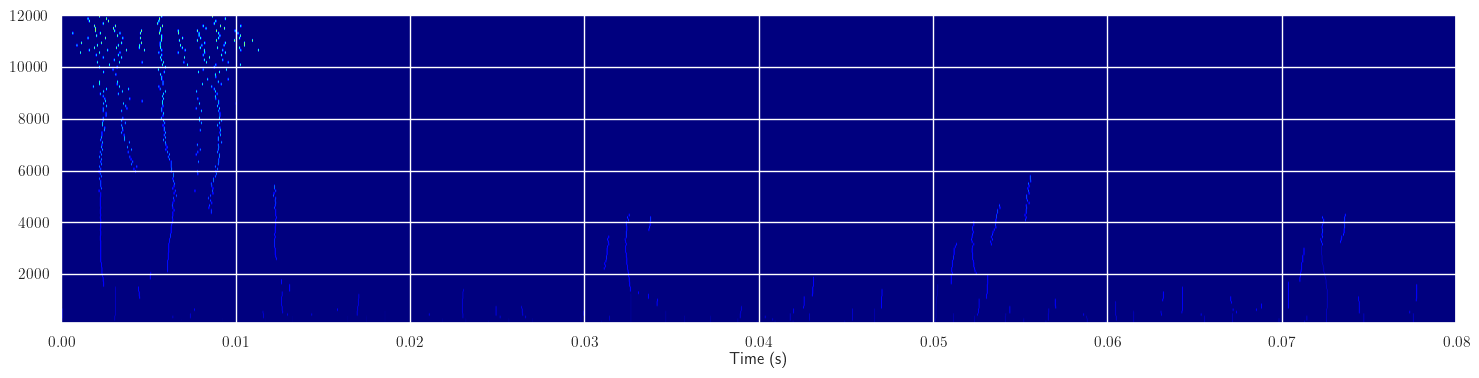

In [ ]:
# find local maxima at all scales 
snakes = np.zeros((len(scales), bins.shape[0]))

for coef in range(len(scales)): 
    rms = np.sqrt(np.mean(np.abs(coefficients[coef])**2))
    peaks_coef, _ = find_peaks(np.abs(coefficients[coef]), height = 1.5*rms, distance = 30)
    
    snakes[coef, peaks_coef] = 1

# count the number of peaks in the bin (length and outlier)
labels = label(snakes)

plt.figure(figsize = (18, 4))
plt.imshow(label(snakes, connectivity=2), extent=[0, len(bins) / 30000, frequencies.min(), frequencies.max()],
           cmap='jet', aspect='auto', origin='lower')
# plt.colorbar()
plt.xlabel("Time (s)")
# plt.savefig("../../../notes/images_week9/segment_snakes.pdf")
plt.show()
